# Project: Cellphone Price Prediction

# Introduction

PRCP-1009: Cellphone Price Prediction Project

The goal of this project is to build a machine learning model that can classify mobile phones into one of four price range categories (Low, Medium, High, Very High) based on their technical specifications. This will assist new mobile brands like Bob’s company in setting competitive prices and making data-driven product decisions.

The dataset includes various mobile features such as RAM, battery power, internal memory, camera specifications, and connectivity options. The target variable, price_range, is a multi-class label representing the cost category of the phone.

In [ ]:
## Loading and Exploring the Dataset
Reading the dataset and exploring basic information.

In [ ]:
## Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Loading the Dataset

In [8]:
df = pd.read_csv("cell_train.csv")

df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
## Data Cleaning
Handling missing values and checking for outliers.

In [ ]:
## Basic Checks

In [11]:
# Showing first 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
# Basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [13]:
# Summary statistics
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
# Checking for missing values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
## Exploratory Data Analysis (EDA)
Performing visualizations to understand feature distributions.

In [16]:
# Checking class balance of target variable
df['price_range'].value_counts().sort_index()

price_range
0    500
1    500
2    500
3    500
Name: count, dtype: int64

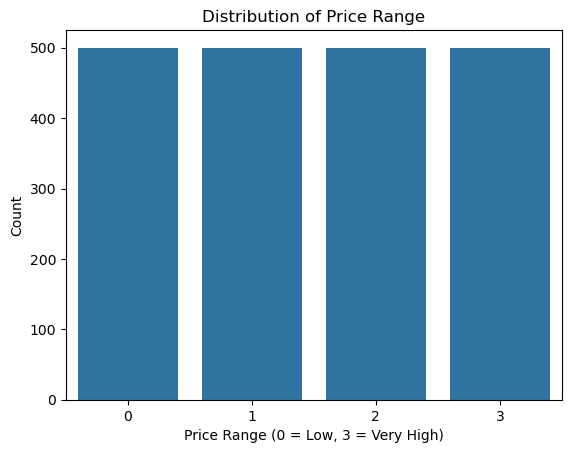

In [17]:
# Visualizing class distribution
sns.countplot(x='price_range', data=df)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range (0 = Low, 3 = Very High)')
plt.ylabel('Count')
plt.show()


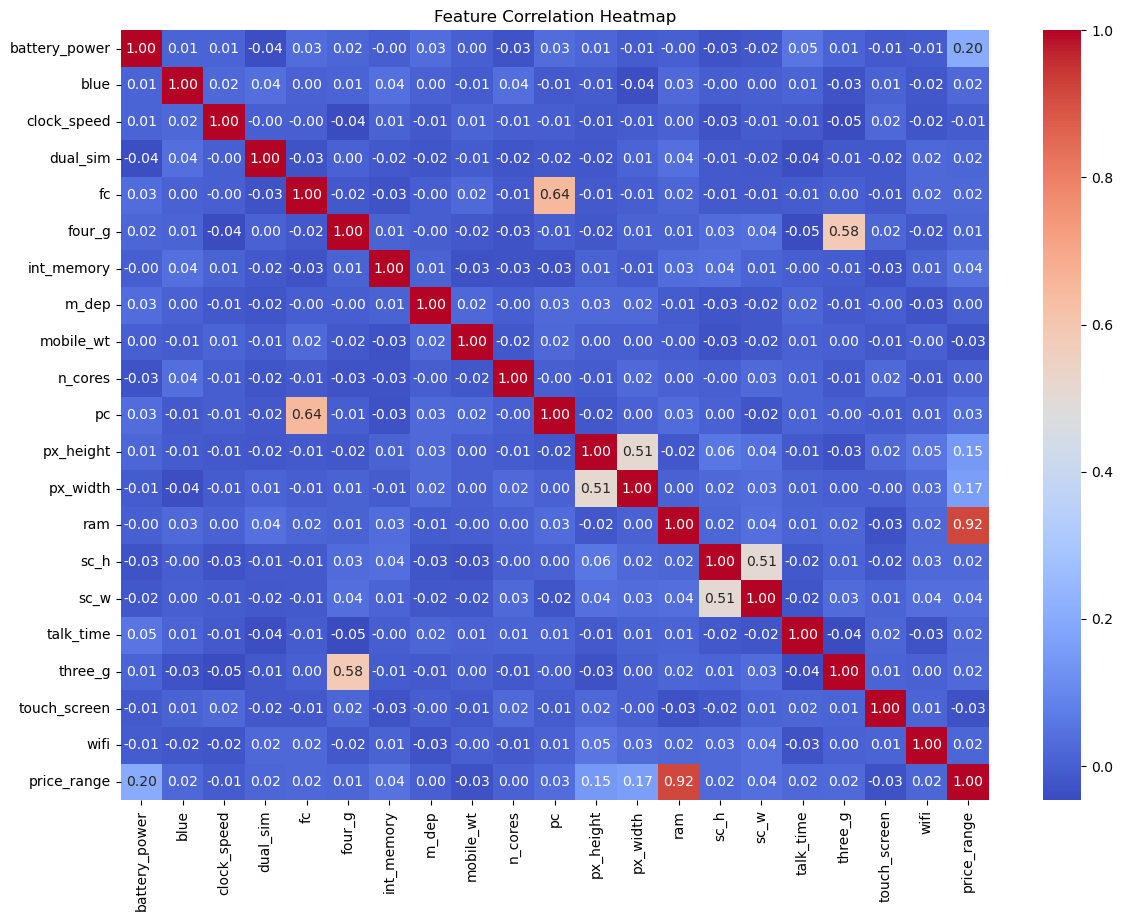

In [18]:
# Correlation heatmap

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


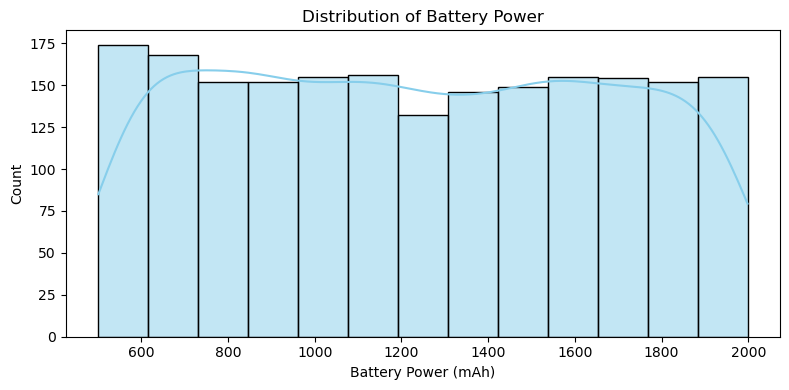

In [19]:
# Battery Power
plt.figure(figsize=(8, 4))
sns.histplot(df['battery_power'], kde=True,color='skyblue')
plt.title('Distribution of Battery Power')
plt.xlabel('Battery Power (mAh)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



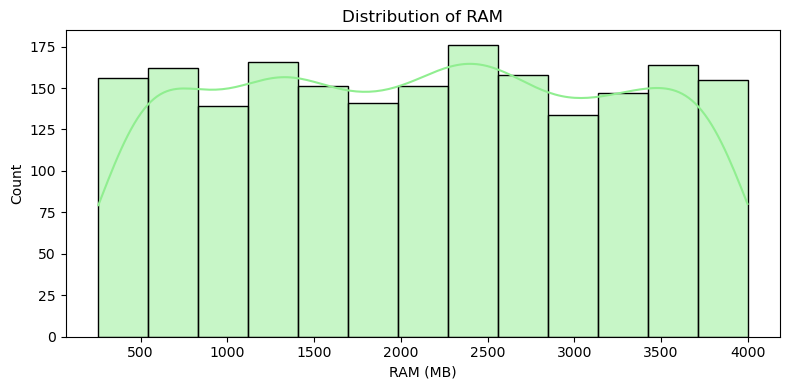

In [20]:
# RAM
plt.figure(figsize=(8, 4))
sns.histplot(df['ram'], kde=True,color='lightgreen')
plt.title('Distribution of RAM')
plt.xlabel('RAM (MB)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


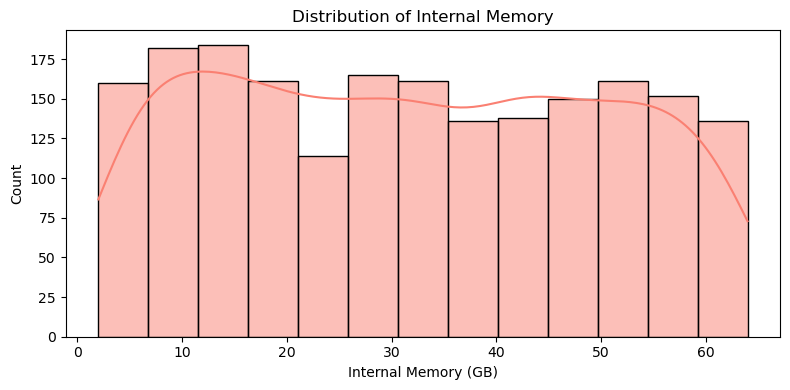

In [21]:
# Internal Memory
plt.figure(figsize=(8, 4))
sns.histplot(df['int_memory'], kde=True,color='salmon')
plt.title('Distribution of Internal Memory')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


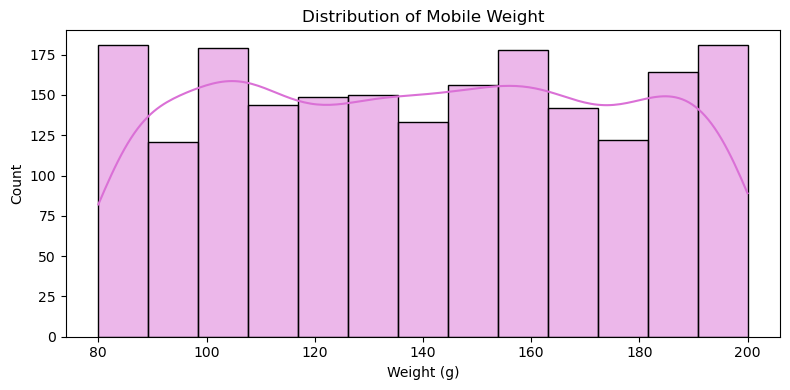

In [22]:
# Mobile Weight
plt.figure(figsize=(8, 4))
sns.histplot(df['mobile_wt'], kde=True,color='orchid')
plt.title('Distribution of Mobile Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


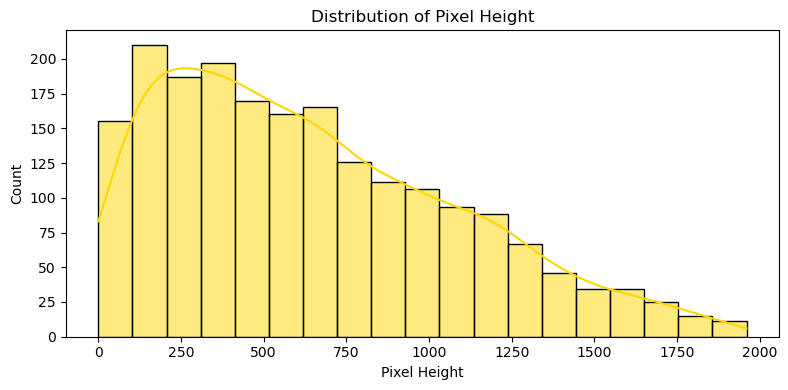

In [23]:
# Pixel Height
plt.figure(figsize=(8, 4))
sns.histplot(df['px_height'], kde=True, color='gold')
plt.title('Distribution of Pixel Height')
plt.xlabel('Pixel Height')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


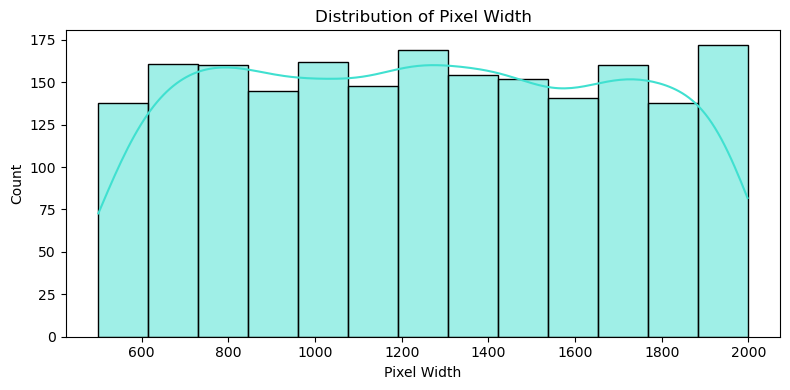

In [24]:
# Pixel Width
plt.figure(figsize=(8, 4))
sns.histplot(df['px_width'], kde=True, color='turquoise')
plt.title('Distribution of Pixel Width')
plt.xlabel('Pixel Width')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [ ]:
## Outlier Detection
Using IQR method to detect and remove outliers.

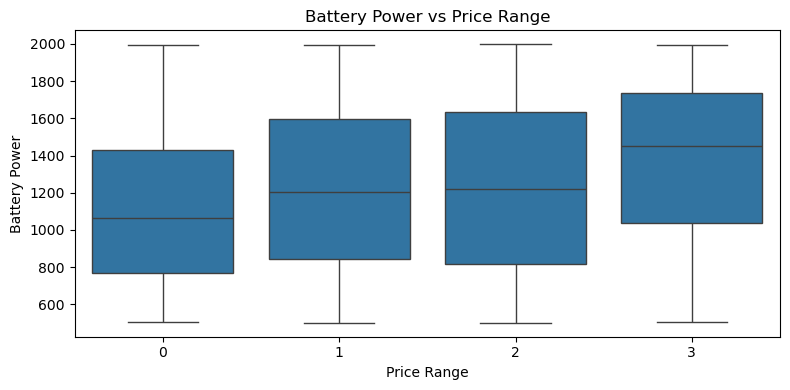

In [26]:
# Battery Power vs Price Range
plt.figure(figsize=(8, 4))
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title('Battery Power vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.tight_layout()
plt.show()


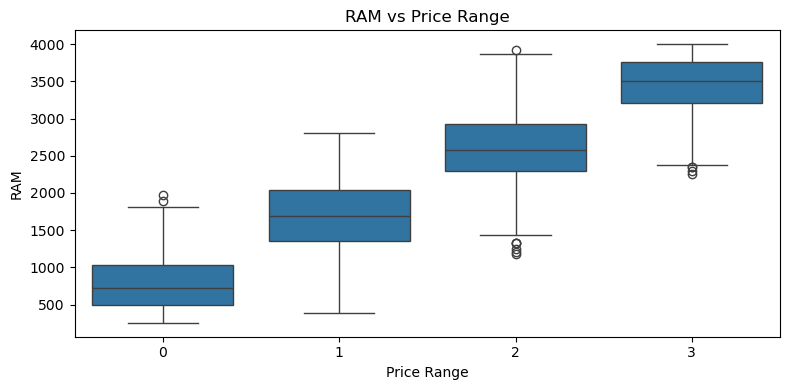

In [27]:
# RAM vs Price Range
plt.figure(figsize=(8, 4))
sns.boxplot(x='price_range', y='ram', data=df)
plt.title('RAM vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.tight_layout()
plt.show()


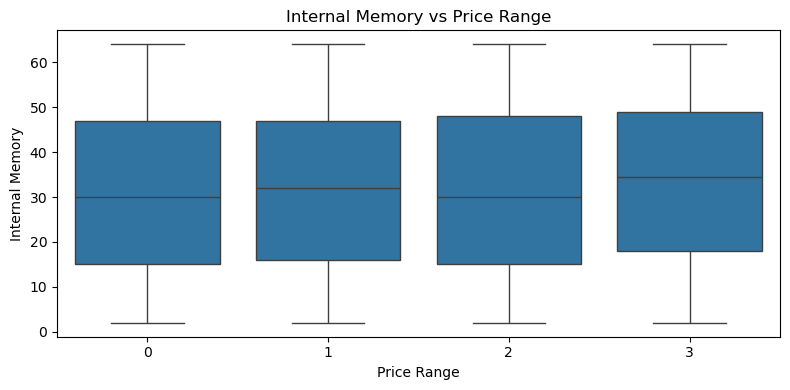

In [28]:
# Internal Memory vs Price Range
plt.figure(figsize=(8, 4))
sns.boxplot(x='price_range', y='int_memory', data=df)
plt.title('Internal Memory vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Internal Memory')
plt.tight_layout()
plt.show()


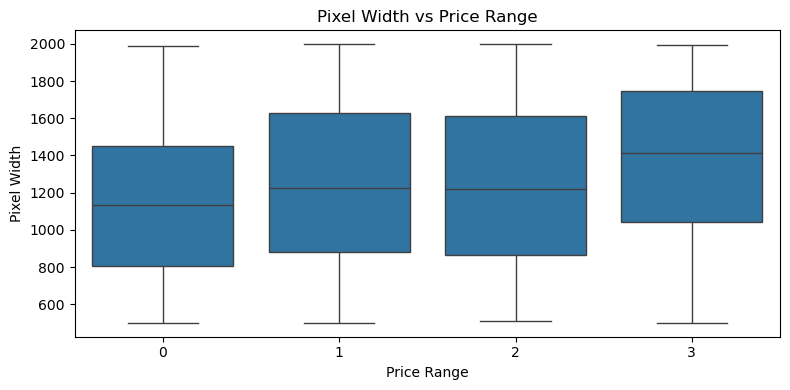

In [29]:
# Pixel Width vs Price Range
plt.figure(figsize=(8, 4))
sns.boxplot(x='price_range', y='px_width', data=df)
plt.title('Pixel Width vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Pixel Width')
plt.tight_layout()
plt.show()


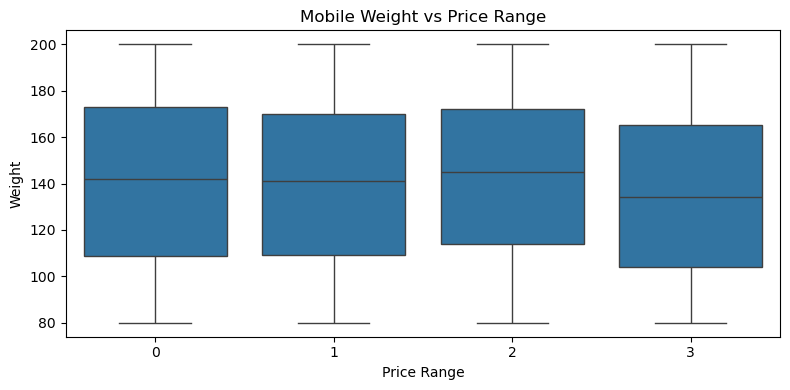

In [30]:
# Mobile Weight vs Price Range
plt.figure(figsize=(8, 4))
sns.boxplot(x='price_range', y='mobile_wt', data=df)
plt.title('Mobile Weight vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()


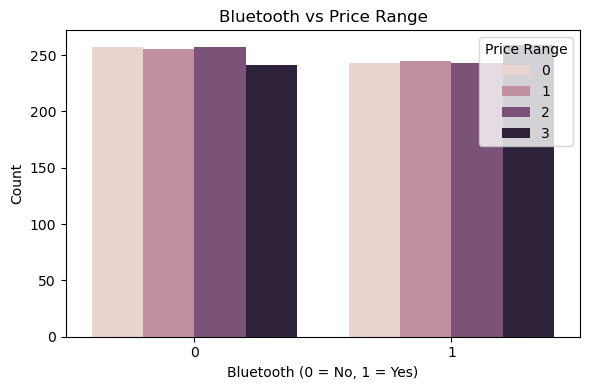

In [31]:
# Bluetooth
plt.figure(figsize=(6, 4))
sns.countplot(x='blue', hue='price_range', data=df)
plt.title('Bluetooth vs Price Range')
plt.xlabel('Bluetooth (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Price Range')
plt.tight_layout()
plt.show()


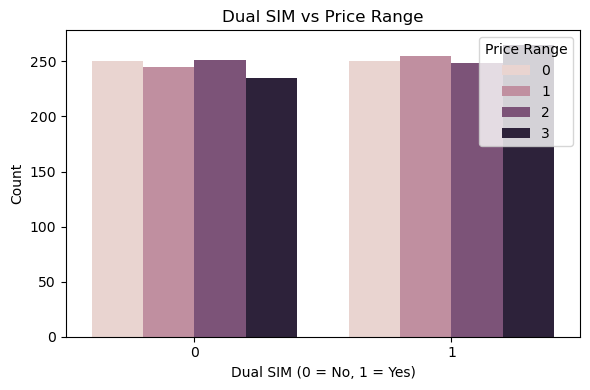

In [32]:
# Dual SIM
plt.figure(figsize=(6, 4))
sns.countplot(x='dual_sim', hue='price_range', data=df)
plt.title('Dual SIM vs Price Range')
plt.xlabel('Dual SIM (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Price Range')
plt.tight_layout()
plt.show()


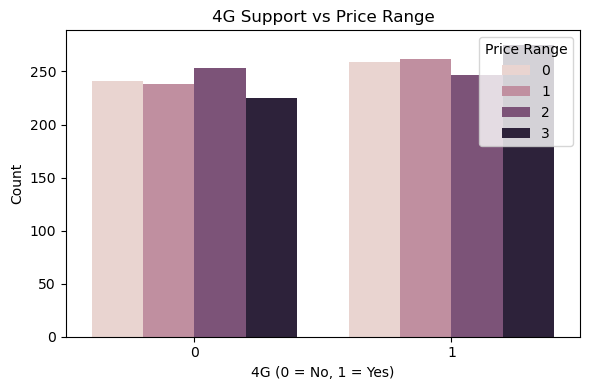

In [33]:
# 4G
plt.figure(figsize=(6, 4))
sns.countplot(x='four_g', hue='price_range', data=df)
plt.title('4G Support vs Price Range')
plt.xlabel('4G (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Price Range')
plt.tight_layout()
plt.show()


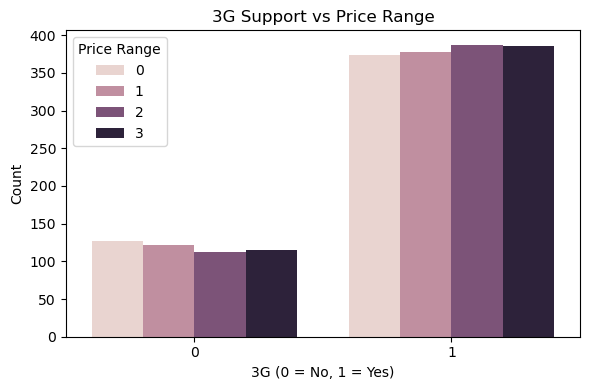

In [34]:
# 3G
plt.figure(figsize=(6, 4))
sns.countplot(x='three_g', hue='price_range', data=df)
plt.title('3G Support vs Price Range')
plt.xlabel('3G (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Price Range')
plt.tight_layout()
plt.show()


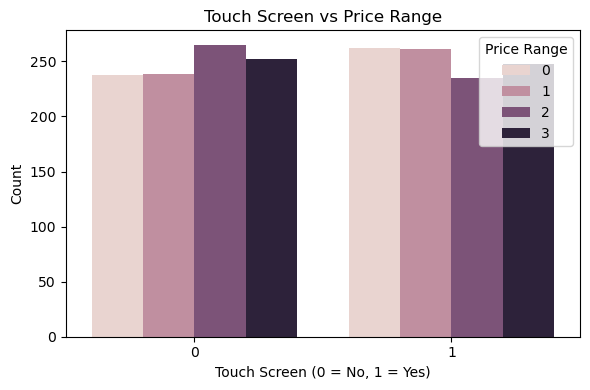

In [35]:
# Touch Screen
plt.figure(figsize=(6, 4))
sns.countplot(x='touch_screen', hue='price_range', data=df)
plt.title('Touch Screen vs Price Range')
plt.xlabel('Touch Screen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Price Range')
plt.tight_layout()
plt.show()


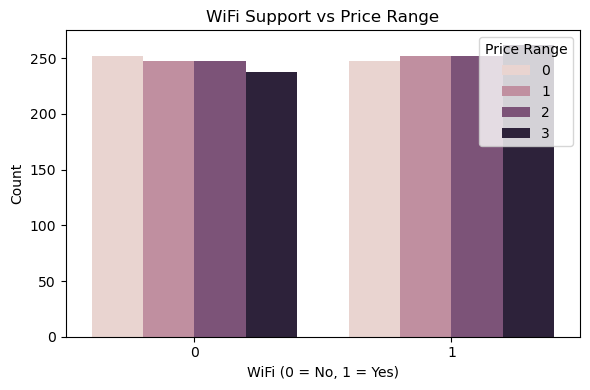

In [36]:
# WiFi
plt.figure(figsize=(6, 4))
sns.countplot(x='wifi', hue='price_range',data=df)
plt.title('WiFi Support vs Price Range')
plt.xlabel('WiFi (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Price Range')
plt.tight_layout()
plt.show()


## Handling Outliers using IQR Method

In [38]:
# IQR method for 'ram'
Q1 = df['ram'].quantile(0.25)
Q3 = df['ram'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Outlier rows
outliers_ram = df[(df['ram'] < lower) | (df['ram'] > upper)]
print(f"RAM outliers: {outliers_ram.shape[0]}")


RAM outliers: 0


In [39]:
# IQR method for 'battery_power'
Q1 = df['battery_power'].quantile(0.25)
Q3 = df['battery_power'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Outlier rows
outliers_battery_power = df[(df['battery_power'] < lower) | (df['battery_power'] > upper)]
print(f"BATTERY_POWER outliers: {outliers_battery_power.shape[0]}")


BATTERY_POWER outliers: 0


In [40]:
# IQR method for 'px_height'
Q1 = df['px_height'].quantile(0.25)
Q3 = df['px_height'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Outlier rows
outliers_px_height = df[(df['px_height'] < lower) | (df['px_height'] > upper)]
print(f"PX_HEIGHT outliers: {outliers_px_height.shape[0]}")


PX_HEIGHT outliers: 2


In [41]:
# IQR method for 'px_width'
Q1 = df['px_width'].quantile(0.25)
Q3 = df['px_width'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Outlier rows
outliers_px_width = df[(df['px_width'] < lower) | (df['px_width'] > upper)]
print(f"PX_WIDTH outliers: {outliers_px_width.shape[0]}")


PX_WIDTH outliers: 0


In [42]:
# IQR method for 'int_memory'
Q1 = df['int_memory'].quantile(0.25)
Q3 = df['int_memory'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Outlier rows
outliers_int_memory = df[(df['int_memory'] < lower) | (df['int_memory'] > upper)]
print(f"INT_MEMORY outliers: {outliers_int_memory.shape[0]}")


INT_MEMORY outliers: 0


In [ ]:
## Data Preprocessing

In [44]:
# Separating features and target
X = df.drop('price_range', axis=1)
y = df['price_range']


In [45]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Initializing scaler
scaler = MinMaxScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [46]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)


In [ ]:
## Model Training and Evaluation
Training multiple classification models and evaluating their performance.

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Training
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, y_train)

# Predicting
y_pred_logreg = logreg.predict(X_test)

# Evaluating
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.935

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.92      0.88      0.90        98
           2       0.90      0.90      0.90        94
           3       0.94      0.99      0.97       100

    accuracy                           0.94       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.94      0.93       400



## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Training
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Predicting
y_pred_dtree = dtree.predict(X_test)

# Evaluating
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dtree))


Decision Tree Accuracy: 0.8375

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       108
           1       0.80      0.79      0.79        98
           2       0.76      0.76      0.76        94
           3       0.84      0.91      0.88       100

    accuracy                           0.84       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400



## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Training
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predicting
y_pred_rf = rf.predict(X_test)

# Evaluating
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       108
           1       0.85      0.84      0.85        98
           2       0.84      0.86      0.85        94
           3       0.95      0.95      0.95       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



## K-Nearest Neighbors (KNN)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Training
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predicting
y_pred_knn = knn.predict(X_test)

# Evaluating
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.395

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.59      0.57       108
           1       0.27      0.33      0.29        98
           2       0.23      0.24      0.24        94
           3       0.61      0.39      0.48       100

    accuracy                           0.40       400
   macro avg       0.41      0.39      0.39       400
weighted avg       0.42      0.40      0.40       400



## Support Vector Machine

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train
svm = SVC()
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.845

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       108
           1       0.78      0.82      0.80        98
           2       0.75      0.81      0.78        94
           3       0.92      0.87      0.89       100

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.85       400



## Model Performance Comparison

We compare all models using accuracy, precision, recall, and F1-score to select the best one.

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [60]:
print("Logistic Regression")

print("Accuracy :", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_logreg, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_logreg, average='weighted'))


Logistic Regression
Accuracy : 0.935
Precision: 0.9347734254992319
Recall   : 0.935
F1 Score : 0.9345916868854551


In [61]:
print("Decision Tree")

print("Accuracy :", accuracy_score(y_test, y_pred_dtree))
print("Precision:", precision_score(y_test, y_pred_dtree, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_dtree, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_dtree, average='weighted'))


Decision Tree
Accuracy : 0.8375
Precision: 0.8387762118736383
Recall   : 0.8375
F1 Score : 0.8375916789396171


In [62]:
print("Random Forest")

print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_rf, average='weighted'))


Random Forest
Accuracy : 0.9
Precision: 0.9003911243054887
Recall   : 0.9
F1 Score : 0.9001188203012324


In [63]:
print("K-Nearest Neighbors")

print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_knn, average='weighted'))


K-Nearest Neighbors
Accuracy : 0.395
Precision: 0.4199684106334842
Recall   : 0.395
F1 Score : 0.4004821530250554


In [64]:
print("Support Vector Machine")

print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_svm, average='weighted'))


Support Vector Machine
Accuracy : 0.845
Precision: 0.8500307097648957
Recall   : 0.845
F1 Score : 0.8467358313328462


## Hyperparameter Tuning

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Defining the model
rf = RandomForestClassifier(random_state=42)

# Defining parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_rf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Tuned Random Forest

In [68]:
from sklearn.metrics import accuracy_score, classification_report

# Predicting on test set
y_pred_best_rf = best_rf.predict(X_test)

# Evaluation
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))


Tuned Random Forest Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       108
           1       0.84      0.84      0.84        98
           2       0.78      0.83      0.80        94
           3       0.93      0.91      0.92       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



## Selecting Best Model

In [70]:
from sklearn.metrics import accuracy_score

print("Logistic Regression Accuracy :", accuracy_score(y_test, y_pred_logreg))
print("Decision Tree Accuracy        :", accuracy_score(y_test, y_pred_dtree))
print("Original Random Forest        :", accuracy_score(y_test, y_pred_rf))
print("KNN Accuracy                  :", accuracy_score(y_test, y_pred_knn))
print("SVM Accuracy                  :", accuracy_score(y_test, y_pred_svm))
print("Tuned Random Forest Accuracy :", accuracy_score(y_test, y_pred_best_rf))


Logistic Regression Accuracy : 0.935
Decision Tree Accuracy        : 0.8375
Original Random Forest        : 0.9
KNN Accuracy                  : 0.395
SVM Accuracy                  : 0.845
Tuned Random Forest Accuracy : 0.88


After evaluating all models, Logistic Regression achieved the highest accuracy of 93.5%, outperforming both the untuned and tuned versions of Random Forest, as well as KNN, SVM, and Decision Tree. Although Random Forest models offered valuable insights into feature importance, Logistic Regression was chosen as the final model for its superior performance, simplicity, and generalization capability.

Random Forest (original and tuned) was still useful for understanding which features most influence mobile price prediction, which is important for business decision-making.



## Feature Importance

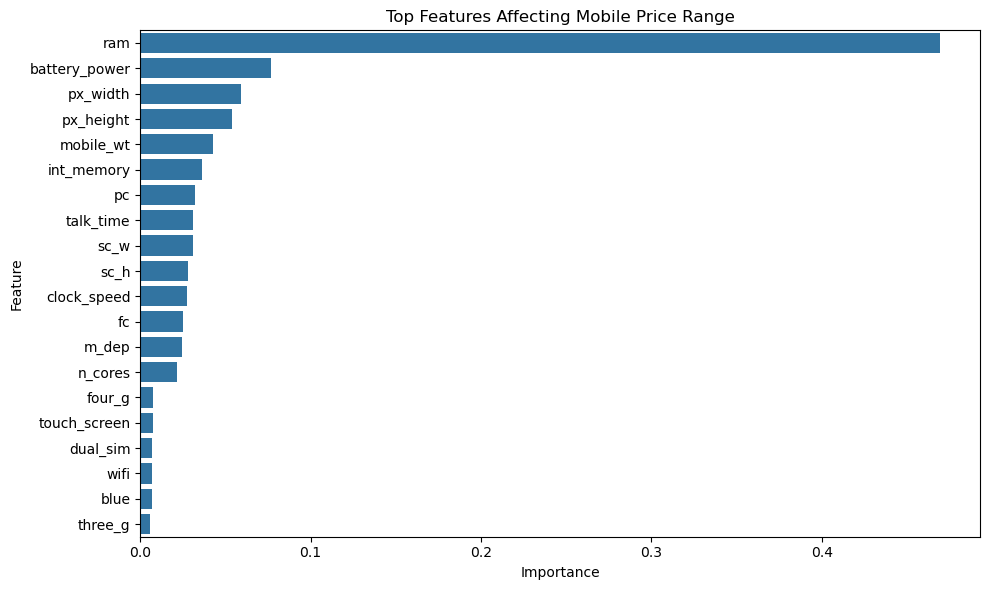

In [73]:
importances = best_rf.feature_importances_
features = X.columns

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Top Features Affecting Mobile Price Range")
plt.tight_layout()
plt.show()


## Project Summary and Conclusion: Cellphone Price Prediction

###  Objective:

The goal of this project was to develop a machine learning model that predicts the price range of mobile phones based on technical specifications. The price range is classified into four categories:

0 → Low

1 → Medium

2 → High

3 → Very High

### Dataset Summary:

The dataset consisted of 2000 records and 21 columns, including numeric and binary features such as:

RAM

Battery power

Internal memory

Mobile weight

Bluetooth, WiFi, 3G, 4G, Touch Screen

Target column: price_range (0 to 3)

The dataset had no missing values and a balanced class distribution.


### Key Steps Followed:

EDA: Visualized distributions of numeric features and relationships with the target variable using histograms, boxplots, and heatmaps.

Outlier Detection: Used the IQR method to identify outliers, but retained them as they represented real-world high-end specs.

Preprocessing: Scaled features using MinMaxScaler for optimal performance across all models.

Model Training: Trained multiple classifiers including Logistic Regression, Decision Tree, Random Forest (original and tuned), KNN, and SVM.

Model Evaluation: Evaluated each model using Accuracy, Precision, Recall, and F1-score.

Feature Importance: Used Random Forest to identify key features like RAM, battery power, and pixel resolution as major drivers of price range.

Final Model Selection: Selected Logistic Regression as the final model due to its highest accuracy of 93.5%.



### Challenges Faced:

Outlier Detection: Identifying outliers without removing valuable high-end device specs.

Choosing Final Model: Some models like SVM and Random Forest had close performance, making it difficult to finalize.

Model Explainability: Logistic Regression performed best but did not provide feature importance like tree-based models.

### Techniques Used to Solve Challenges:

Outliers: Detected using the IQR method, but retained since they represented real and valid high-spec devices.

Model Comparison: Evaluated all models using multiple metrics (accuracy, precision, recall, F1) to select the most consistent performer.

Feature Analysis: Used Random Forest’s feature importance to extract business insights even though it wasn't the final model.

Scaling: Used MinMaxScaler to improve performance, especially for distance-based models like KNN and SVM.

### Final Model Selection:

Chosen Model: Logistic Regression

Reason: Achieved the highest accuracy of 93.5%, was simple, fast, and generalized well.

### Business Insight:

The model showed that features like RAM, battery_power, and pixel resolution play a key role in pricing. This insight can help mobile manufacturers like Bob’s company prioritize improvements in these areas to launch products in higher price brackets.



### Possible Future Improvements:

Tuning SVM and KNN with advanced search techniques like RandomizedSearchCV

Adding feature engineering: price-per-spec ratio, screen size buckets, or RAM categories

Deploying the final model using Streamlit for business or internal use

Visualizing confusion matrix and ROC curves for deeper evaluation